<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt


Load the dataset into a dataframe.


In [7]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


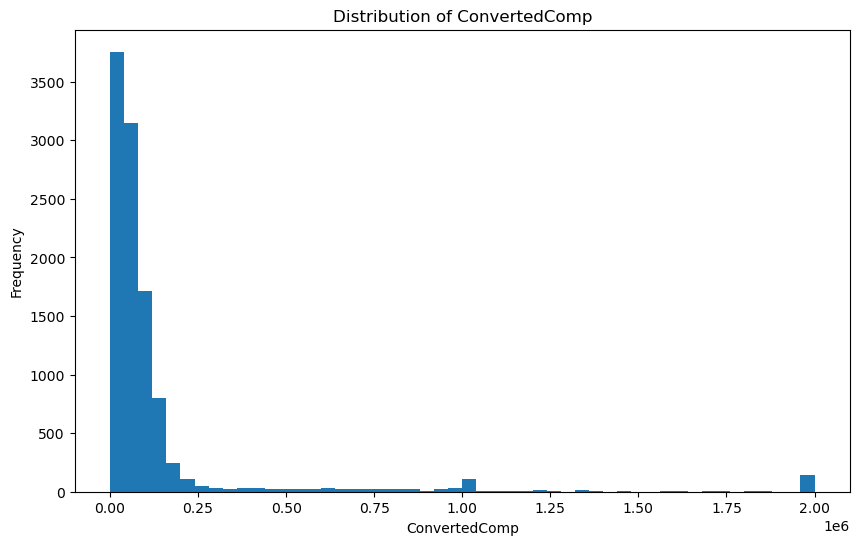

In [8]:
# plot the distribution curve for the column ConvertedComp
plt.figure(figsize=(10,6))
plt.hist(df['ConvertedComp'], bins=50)
plt.title('Distribution of ConvertedComp')
plt.xlabel('ConvertedComp')
plt.ylabel('Frequency')
plt.show()


Plot the histogram for the column `ConvertedComp`.


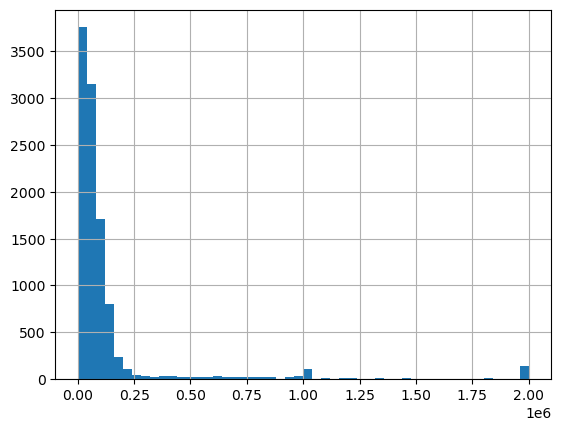

In [9]:
df["ConvertedComp"].hist(bins=50)
plt.show()


What is the median of the column `ConvertedComp`?


In [10]:
median_compensation = df['ConvertedComp'].median()
print(median_compensation)


57745.0


How many responders identified themselves only as a **Man**?


In [14]:
num_males = df[(df['Gender'] == 'Man') & (df['Gender'] != 'Woman') & (df['Gender'].notnull())]['Gender'].count()
print(num_males)


10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [18]:
df_female = df[(df['Gender'] == 'Woman') & (df['Gender'].notnull())]
median_female_comp = df_female['ConvertedComp'].median()
print(median_female_comp)

57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [19]:
age_summary = df['Age'].describe()
print(age_summary[['min', '25%', '50%', '75%', 'max']])


min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


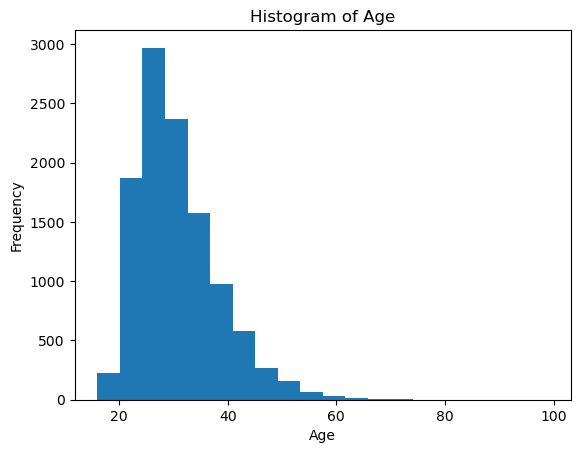

In [20]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot histogram of Age column
ax.hist(df['Age'], bins=20)

# Set labels for the plot
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Age')

# Show the plot
plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


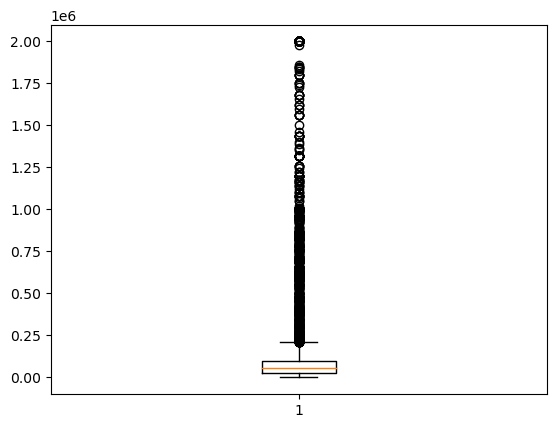

In [21]:
plt.boxplot(df['ConvertedComp'].dropna())
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [22]:
q1 = df['ConvertedComp'].describe()['25%']
q3 = df['ConvertedComp'].describe()['75%']
iqr = q3 - q1
print("Interquartile Range (IQR) of ConvertedComp: ", iqr)


Interquartile Range (IQR) of ConvertedComp:  73132.0


Find out the upper and lower bounds.


In [23]:
q1 = df['ConvertedComp'].describe()['25%']
q3 = df['ConvertedComp'].describe()['75%']
iqr = q3 - q1
upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr
print("Upper Bound: ", upper_bound)
print("Lower Bound: ", lower_bound)

Upper Bound:  209698.0
Lower Bound:  -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [24]:
num_outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]['ConvertedComp'].count()
print("Number of outliers in ConvertedComp column: ", num_outliers)


Number of outliers in ConvertedComp column:  879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [25]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_new = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]



## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [26]:
corr_matrix = df.corr()
age_corr = corr_matrix['Age']
age_corr.drop('Age', inplace=True)
print(age_corr)



Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
